https://programmers.co.kr/learn/courses/30/lessons/17681?language=python3

네오는 평소 프로도가 비상금을 숨겨놓는 장소를 알려줄 비밀지도를 손에 넣었다. 그런데 이 비밀지도는 숫자로 암호화되어 있어 위치를 확인하기 위해서는 암호를 해독해야 한다. 다행히 지도 암호를 해독할 방법을 적어놓은 메모도 함께 발견했다.

1. 지도는 한 변의 길이가 n인 정사각형 배열 형태로, 각 칸은 "공백"(" ") 또는 "벽"("#") 두 종류로 이루어져 있다.
2. 전체 지도는 두 장의 지도를 겹쳐서 얻을 수 있다. 각각 "지도 1"과 "지도 2"라고 하자. 지도 1 또는 지도 2 중 어느 하나라도 벽인 부분은 전체 지도에서도 벽이다. 지도 1과 지도 2에서 모두 공백인 부분은 전체 지도에서도 공백이다.
3. "지도 1"과 "지도 2"는 각각 정수 배열로 암호화되어 있다.
4. 암호화된 배열은 지도의 각 가로줄에서 벽 부분을 1, 공백 부분을 0으로 부호화했을 때 얻어지는 이진수에 해당하는 값의 배열이다.

네오가 프로도의 비상금을 손에 넣을 수 있도록, 비밀지도의 암호를 해독하는 작업을 도와줄 프로그램을 작성하라.

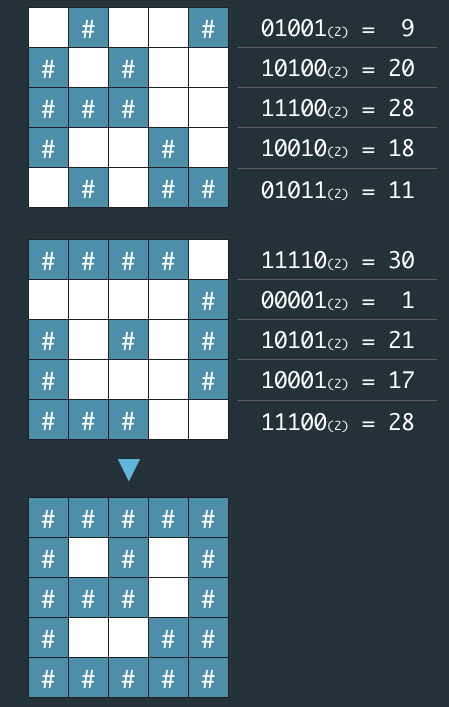

입력 형식

입력으로 지도의 한 변 크기 n 과 2개의 정수 배열 arr1, arr2가 들어온다.

- 1 ≦ n ≦ 16
- arr1, arr2는 길이 n인 정수 배열로 주어진다.
- 정수 배열의 각 원소 x를 이진수로 변환했을 때의 길이는 n 이하이다. 즉, 0 ≦ x ≦ 2n- 1을 만족한다.

출력 형식 

원래의 비밀지도를 해독하여 '#', 공백으로 구성된 문자열 배열로 출력하라.

In [1]:
n = 6
arr1 = [46, 33, 33 ,22, 31, 50]
arr2 = [27 ,56, 19, 14, 14, 10]
# ["######", "### #", "## ##", " #### ", " #####", "### # "]

In [8]:
arr1_b = list(format(x,'b') for x in arr1)
arr2_b = list(format(x,'b') for x in arr2)
arr1_b, arr2_b

(['101110', '100001', '100001', '10110', '11111', '110010'],
 ['11011', '111000', '10011', '1110', '1110', '1010'])

In [3]:
for i, v in enumerate(arr1_b):
    arr1_b[i] = '0'*(n-len(v))+v
arr1_b

['101110', '100001', '100001', '010110', '011111', '110010']

In [4]:
arr2_b =list(map(lambda x : '0'*(n-len(x))+x, arr2_b))
arr2_b

['011011', '111000', '010011', '001110', '001110', '001010']

In [10]:
answer = []

In [11]:
for b_1, b_2 in zip(arr1_b, arr2_b):
    answer.append(str(int(b_1)+int(b_2)))

In [13]:
answer = list(map(lambda x: '0'*(n-len(x))+x, answer))
answer

['112121', '211001', '110012', '011220', '012221', '111020']

In [20]:
import re
for i, ans in enumerate(answer):
    ans = re.sub('[1-2]','#', ans)
    answer[i] = re.sub('[0]', ' ', ans)
answer

['######', '###  #', '##  ##', ' #### ', ' #####', '### # ']

solution

In [ ]:
import re
def solution(n, arr1, arr2):
    answer = []
    #2진수로 변환
    arr1_b = list(format(x,'b') for x in arr1)
    arr2_b = list(format(x,'b') for x in arr2)
    #두 리스트 더하기
    for b_1, b_2 in zip(arr1_b, arr2_b):
        answer.append(str(int(b_1)+int(b_2)))
    #자리수 채우기
    answer = list(map(lambda x: '0'*(n-len(x))+x, answer))
    
    #1,2는 #으로 0은 빈칸으로 변환
    for i, ans in enumerate(answer):
        ans = re.sub('[1-2]','#', ans)
        answer[i] = re.sub('[0]', ' ', ans)
    return answer

다른사람코드

In [ ]:
def solution(n, arr1, arr2):
    answer = []
    for i,j in zip(arr1,arr2):
        a12 = str(bin(i|j)[2:]) #bin으로 이진수 민들고 오알연산 바로함 앞에 Ob자름
        a12=a12.rjust(n,'0') #str 채움
        a12=a12.replace('1','#')
        a12=a12.replace('0',' ')
        answer.append(a12)
    return answer